# Basic Keras Syntax and Data Analysis

Keras is now the main API choice with TensorFlow 2.0.  In this project, we will go through a basic regression task to understand the syntax of Keras and how to add layers.

**Before starting below are essential concepts to grasp for effectively using Keras:**

1. **Sample**: A sample is a single element of a dataset. For instance, in a convolutional network, a sample could be an individual image, while in a speech recognition model, it might correspond to a single audio file.

2. **Batch**: A batch comprises a set of N samples, processed independently and in parallel. During training, a batch contributes to one update of the model's parameters. Larger batch sizes better approximate the input data distribution, although they also require more processing time. For inference (evaluation/prediction), choosing a batch size that fits within memory is recommended for faster processing.

3. **Epoch**: An epoch is an arbitrary point used to delineate training into distinct phases. It's typically defined as "one pass over the entire dataset." Epochs are helpful for logging and conducting periodic evaluations.

4. **Validation**: When using `validation_data` or `validation_split` with the `fit` method of Keras models, the model is evaluated at the end of each epoch. This helps monitor its performance on data not used for training.

5. **Callbacks**: Keras offers the capability to add callbacks designed to execute specific actions at the end of each epoch. Examples of callbacks include adjusting the learning rate and saving model checkpoints.

These fundamental concepts lay the foundation for understanding and effectively using Keras for various machine learning tasks.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set and focus on the syntax of TensorFlow 2.0.

We possess data containing measurements of rare gem stones, including two measurement features and the corresponding sale price. Our goal is to predict the sale price of a new gem stone recently mined so that we can set a fair price in the market.

### Load the Data

In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('fake_reg.csv')

In [67]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look at the correlation between the features and the "price" of this made up product.z

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

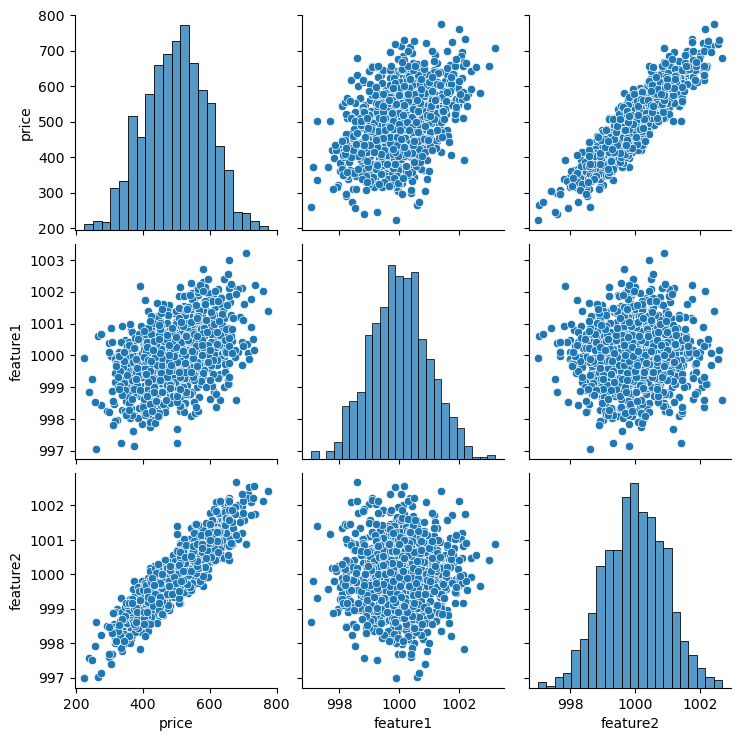

In [69]:
sns.pairplot(df)
plt.show()

### Test/Train Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=52)

In [72]:
#check
X_train.shape

(700, 2)

In [73]:
#check
X_test.shape

(300, 2)

In [74]:
#check
y_train.shape

(700,)

In [75]:
#check
y_test.shape

(300,)

## Normalizing/Scaling the Data

Let's scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
# let's try to understand what is MinMaxScaler and how it works!
#help(MinMaxScaler)

In [77]:
scaler = MinMaxScaler()

In [78]:
# To prevent data leakage from the test set, we only fit our scaler to the training set

In [79]:
scaler.fit(X_train)

MinMaxScaler()

In [80]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
#check
X_train

array([[0.29647306, 0.63472092],
       [0.36480286, 0.70260209],
       [0.37110888, 0.75778097],
       ...,
       [0.24348362, 0.66455559],
       [0.59104479, 0.68732529],
       [0.27657173, 0.31086695]])

In [82]:
#check
X_train.max()

1.0

In [83]:
#check
X_train.min()

0.0

# TensorFlow 2.0 Syntax

When it comes to importing Keras from Tensorflow, there are various methods available to choose from, and the choice ultimately depends on personal style.

In [84]:
import tensorflow as tf

In [85]:
from tensorflow.keras.models import Sequential

In [86]:
# let's try to understand what is Sequential and how it works!
#help(Sequential)

## Creating a Model

There are two approaches to constructing models using the TF 2 Keras API: you can either provide a list of layers all at once or add them individually, and you have the flexibility to select the method that suits your preference.

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [88]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [89]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by specifying our optimization algorithm.

In [90]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

# Compile the model's optimization algorithm (RMSprop in this case) and the loss function (mean squared error (MSE)) 
model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss in different types of problem

It is depends on the what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')
 
 ### Training

In [91]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
22/22 [==============================] - 0s 563us/step - loss: 257884.6562
Epoch 2/500
22/22 [==============================] - 0s 571us/step - loss: 257578.8281
Epoch 3/500
22/22 [==============================] - 0s 528us/step - loss: 257264.6562
Epoch 4/500
22/22 [==============================] - 0s 517us/step - loss: 256917.2812
Epoch 5/500
22/22 [==============================] - 0s 423us/step - loss: 256529.0312
Epoch 6/500
22/22 [==============================] - 0s 432us/step - loss: 256095.4688
Epoch 7/500
22/22 [==============================] - 0s 453us/step - loss: 255611.0469
Epoch 8/500
22/22 [==============================] - 0s 434us/step - loss: 255068.6875
Epoch 9/500
22/22 [==============================] - 0s 430us/step - loss: 254464.1406
Epoch 10/500
22/22 [==============================] - 0s 437us/step - loss: 253790.1562
Epoch 11/500
22/22 [==============================] - 0s 428us/step - loss: 253045.8281
Epoch 12/500
22/22 [=====================

Epoch 95/500
22/22 [==============================] - 0s 475us/step - loss: 1054.7584
Epoch 96/500
22/22 [==============================] - 0s 446us/step - loss: 1023.9406
Epoch 97/500
22/22 [==============================] - 0s 406us/step - loss: 990.7806
Epoch 98/500
22/22 [==============================] - 0s 421us/step - loss: 962.5114
Epoch 99/500
22/22 [==============================] - 0s 426us/step - loss: 934.1465
Epoch 100/500
22/22 [==============================] - 0s 424us/step - loss: 911.7502
Epoch 101/500
22/22 [==============================] - 0s 424us/step - loss: 885.7379
Epoch 102/500
22/22 [==============================] - 0s 391us/step - loss: 858.8190
Epoch 103/500
22/22 [==============================] - 0s 404us/step - loss: 831.8947
Epoch 104/500
22/22 [==============================] - 0s 398us/step - loss: 805.3228
Epoch 105/500
22/22 [==============================] - 0s 391us/step - loss: 781.0103
Epoch 106/500
22/22 [==============================] - 0s

22/22 [==============================] - 0s 389us/step - loss: 23.8738
Epoch 191/500
22/22 [==============================] - 0s 395us/step - loss: 23.6152
Epoch 192/500
22/22 [==============================] - 0s 403us/step - loss: 23.7670
Epoch 193/500
22/22 [==============================] - 0s 408us/step - loss: 23.7397
Epoch 194/500
22/22 [==============================] - 0s 385us/step - loss: 23.6704
Epoch 195/500
22/22 [==============================] - 0s 413us/step - loss: 23.7886
Epoch 196/500
22/22 [==============================] - 0s 394us/step - loss: 24.3594
Epoch 197/500
22/22 [==============================] - 0s 373us/step - loss: 23.7016
Epoch 198/500
22/22 [==============================] - 0s 418us/step - loss: 23.7607
Epoch 199/500
22/22 [==============================] - 0s 410us/step - loss: 23.4881
Epoch 200/500
22/22 [==============================] - 0s 378us/step - loss: 23.8132
Epoch 201/500
22/22 [==============================] - 0s 388us/step - loss: 23

22/22 [==============================] - 0s 407us/step - loss: 23.8445
Epoch 287/500
22/22 [==============================] - 0s 400us/step - loss: 23.6022
Epoch 288/500
22/22 [==============================] - 0s 403us/step - loss: 23.8550
Epoch 289/500
22/22 [==============================] - 0s 385us/step - loss: 23.7813
Epoch 290/500
22/22 [==============================] - 0s 373us/step - loss: 23.7884
Epoch 291/500
22/22 [==============================] - 0s 361us/step - loss: 23.7908
Epoch 292/500
22/22 [==============================] - 0s 379us/step - loss: 23.5685
Epoch 293/500
22/22 [==============================] - 0s 389us/step - loss: 23.5666
Epoch 294/500
22/22 [==============================] - 0s 401us/step - loss: 23.8529
Epoch 295/500
22/22 [==============================] - 0s 386us/step - loss: 24.0045
Epoch 296/500
22/22 [==============================] - 0s 400us/step - loss: 23.3906
Epoch 297/500
22/22 [==============================] - 0s 368us/step - loss: 23

22/22 [==============================] - 0s 397us/step - loss: 23.5461
Epoch 383/500
22/22 [==============================] - 0s 393us/step - loss: 23.5430
Epoch 384/500
22/22 [==============================] - 0s 394us/step - loss: 23.3865
Epoch 385/500
22/22 [==============================] - 0s 390us/step - loss: 24.1338
Epoch 386/500
22/22 [==============================] - 0s 407us/step - loss: 24.0139
Epoch 387/500
22/22 [==============================] - 0s 404us/step - loss: 23.9046
Epoch 388/500
22/22 [==============================] - 0s 391us/step - loss: 23.6186
Epoch 389/500
22/22 [==============================] - 0s 378us/step - loss: 23.5525
Epoch 390/500
22/22 [==============================] - 0s 400us/step - loss: 23.6412
Epoch 391/500
22/22 [==============================] - 0s 371us/step - loss: 23.5573
Epoch 392/500
22/22 [==============================] - 0s 404us/step - loss: 23.6508
Epoch 393/500
22/22 [==============================] - 0s 379us/step - loss: 23

22/22 [==============================] - 0s 417us/step - loss: 24.0404
Epoch 479/500
22/22 [==============================] - 0s 402us/step - loss: 23.8004
Epoch 480/500
22/22 [==============================] - 0s 375us/step - loss: 23.3204
Epoch 481/500
22/22 [==============================] - 0s 393us/step - loss: 23.8676
Epoch 482/500
22/22 [==============================] - 0s 383us/step - loss: 23.8619
Epoch 483/500
22/22 [==============================] - 0s 388us/step - loss: 23.8420
Epoch 484/500
22/22 [==============================] - 0s 418us/step - loss: 23.6050
Epoch 485/500
22/22 [==============================] - 0s 405us/step - loss: 23.8209
Epoch 486/500
22/22 [==============================] - 0s 392us/step - loss: 23.8400
Epoch 487/500
22/22 [==============================] - 0s 393us/step - loss: 23.6776
Epoch 488/500
22/22 [==============================] - 0s 400us/step - loss: 23.3181
Epoch 489/500
22/22 [==============================] - 0s 390us/step - loss: 24

## Evaluation

Let's evaluate performance on the training set and test set and compare these two performances to check for overfitting.

In [92]:
#model.history.history

In [93]:
loss = model.history.history['loss']

Text(0, 0.5, 'Loss')

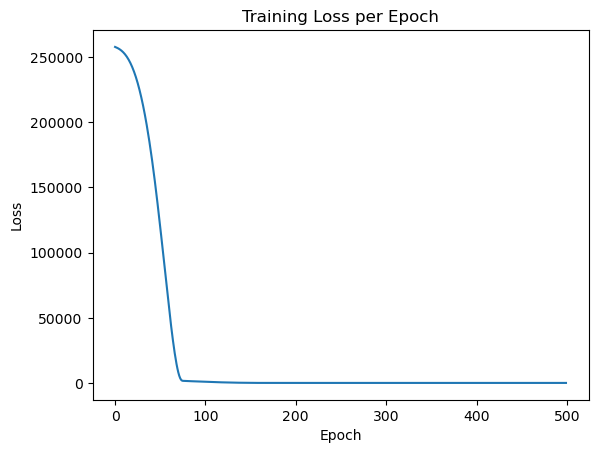

In [94]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");
plt.xlabel("Epoch")
plt.ylabel("Loss")

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [95]:
model.metrics_names

['loss']

In [96]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [97]:
training_score

25.1163330078125

In [98]:
test_score

26.821460723876953

### Further Evaluations

In [99]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 458us/step


In [100]:
#test_predictions

In [101]:
prd_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [102]:
prd_df

,Test True Y
0,418.457178
1,774.407854
2,515.778446
3,370.741778
4,504.431373
...,...
295,699.733841
296,567.044978
297,593.230519
298,611.147637


In [103]:
test_prds = pd.Series(test_predictions.reshape(300,))

In [104]:
test_prds

0      418.824554
1      772.724365
2      520.093872
3      370.304565
4      505.526215
          ...    
295    702.035706
296    564.487671
297    591.102722
298    607.065918
299    274.768402
Length: 300, dtype: float32

In [105]:
prd_df = pd.concat([prd_df,test_prds],axis=1)

In [106]:
prd_df.columns = ['Test True Y','Model Predictions']

In [107]:
prd_df

,Test True Y,Model Predictions
0,418.457178,418.824554
1,774.407854,772.724365
2,515.778446,520.093872
3,370.741778,370.304565
4,504.431373,505.526215
...,...,...
295,699.733841,702.035706
296,567.044978,564.487671
297,593.230519,591.102722
298,611.147637,607.065918


Let's compare to the real test labels!

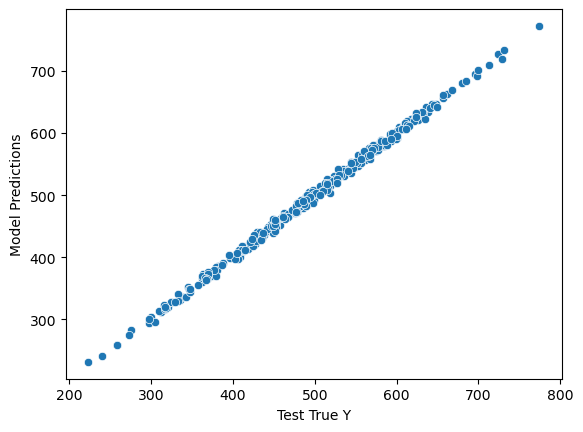

In [108]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=prd_df)
plt.show()

In [109]:
prd_df['Error'] = prd_df['Test True Y'] - prd_df['Model Predictions']

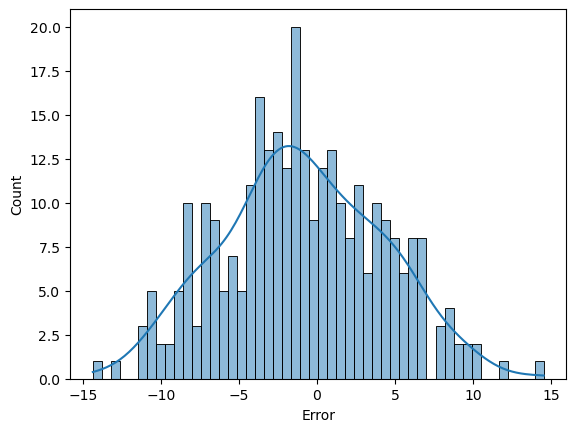

In [110]:
sns.histplot(prd_df['Error'], bins=50, kde=True)
plt.show()

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [112]:
mean_absolute_error(prd_df['Test True Y'],prd_df['Model Predictions'])

4.212268592447613

In [113]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


mean absolute_error only offset by ~0.5% which is good!

In [114]:
mean_squared_error(prd_df['Test True Y'],prd_df['Model Predictions'])

26.821451915560118

In [115]:
# Essentially the same thing, difference just due to precision
test_score

26.821460723876953

In [116]:
#RMSE
test_score**0.5

5.178943977673146

# Predicting on brand new data

Consider this scenario: Imagine we've just unearthed a brand new gemstone. The question arises: How do we determine its price? Remarkably, the process for pricing this gemstone is precisely analogous to making predictions on entirely new test data in a machine learning model!

In [117]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [118]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.12554093, 0.53919925]])

In [119]:
new_gem = scaler.transform(new_gem)

In [120]:
model.predict(new_gem)

1/1 [==============================] - 0s 11ms/step


array([[420.64038]], dtype=float32)

## Saving and Loading a Model

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
my_model = load_model('my_model.h5')

In [124]:
my_model.predict(new_gem)

1/1 [==============================] - 0s 32ms/step


array([[420.64038]], dtype=float32)

# Done!